In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Setting values
H = 1
z_max = 7*H
z_min = 0

num_particles = 100000
size = 1


In [3]:
#Generating X and Y positions
x_pos = np.random.random(int(num_particles))*size
y_pos = np.random.random(int(num_particles))*size

In [4]:
#Generating Heights
heights = np.ones(num_particles)
for i in range(num_particles):
    x=-22
    while x==-22:
        rand_z = np.random.random()*(z_max-z_min) + z_min
        p_keep = np.exp(-1*rand_z/H)
        if np.random.random() <= p_keep:
            x = rand_z
    heights[i] = x

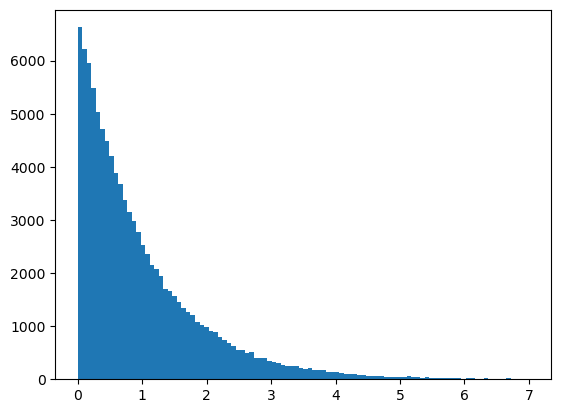

In [5]:
plt.hist(heights,bins=100)
plt.show()

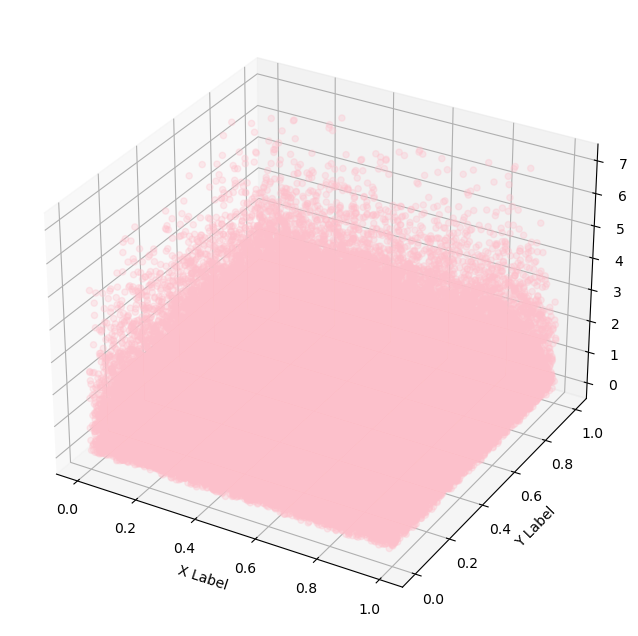

In [22]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_pos, y_pos, heights,color='pink',alpha=0.3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [7]:
arr = np.array([11,12,13,14,15])
new_array = np.where(arr>12)
print(new_array)

(array([2, 3, 4]),)


In [8]:
nphotons = 20000  # number of photons
b = 0.008
sigma = np.pi*b**2  # cross-section for interaction with an atmosphere particle

# generate random x and y values for the photons
xphotons = np.random.random(nphotons)*size
yphotons = np.random.random(nphotons)*size

# set up an array to hold the height where the photon first interacts with an atmosphere particle, but don't fill it yet
hcollide = np.zeros(nphotons)

In [9]:
for j in range(nphotons):
    
    # The particles in the photon's path are those with projected distances less than b in the xy-plane.
    particles_in_path = np.where(np.sqrt((x_pos-xphotons[j])**2 + (y_pos-yphotons[j])**2)<0.008)
    
    if len(particles_in_path[0]) == 0:  # no collisions
        hcollide[j] = 0
        
    else:
        # the photon collides with the particle in its path that has the maximum height
        hcollide[j] = np.max(heights[particles_in_path[0]])

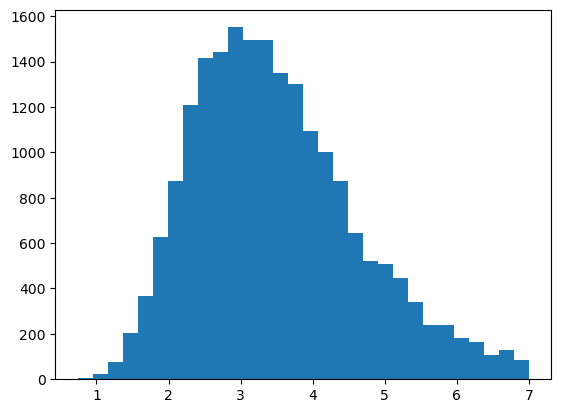

In [10]:
plt.hist(hcollide,bins=30)
plt.show()

In [11]:
import pandas as pd
data  = {'x_pos':x_pos,'y_pos':y_pos,'z_pos':heights}
df = pd.DataFrame(data)
num_H = len(df[df['z_pos']<=1]) #Number of particles in 1st Scale height

#Volume of 1st Scale height region is 1x1x1
V_1 = 1

num_density = num_H/V_1

print(num_density)

63274.0


In [12]:
print(sigma)

0.00020106192982974675


In [13]:
z_est = 3.2

n_est = num_density*np.exp(-1*z_est/H)

print(n_est)

2579.187694527144


In [14]:
T = n_est*sigma*H
print(T)

0.5185764552547628


In [15]:
def optical_depth_est(z_est,sigma=0.00020106192982974675,H=1):
    num_density = 63134.0
    n_est = num_density*np.exp(-1*z_est/H)
    T = n_est*sigma*H
    print(f'Estimated optical depth at height {z_est} is {T}')
    return None

In [16]:
#At z_est = 0.5
optical_depth_est(0.5)

#At z_est = 6.9
optical_depth_est(6.9)

Estimated optical depth at height 0.5 is 7.6992055015344105
Estimated optical depth at height 6.9 is 0.012792670898735268


## Question 3

### Goal: Calculate column density $N_e$

$N_e = 8\pi \times \frac{g_1}{g_2} \times \frac{\Delta \nu}{A_{21}} \times \lambda_0^{-2}$

Where

$\Delta \nu = \nu_0(\,\frac{c_s}{c})\, = \frac{c}{\lambda_0}(\,\frac{c_s}{c}) = \frac{c_s}{\lambda_0}$

And

$c_s = \frac{K_bT}{\mu}$

In [17]:
from astropy import constants as cns, units as u

In [18]:
# Calculating c_s

T = 1e4*u.K
k_b = cns.k_B.cgs
mu = cns.m_p.cgs

c_s = np.sqrt(k_b*T/mu)

In [19]:
# Calculating change in frequency
lmbd = 1216e-10 * u.m
l_0 = lmbd.cgs

del_nu = c_s/l_0

print(del_nu)

74715236232.15303 erg(1/2) / (g(1/2) cm)


In [20]:
# Calculating N_e
A_21 = 6.3e8/u.s
g_2 = 8
g_1 = 2

N_e = 8* np.pi * (g_1/g_2) * (del_nu/A_21) * l_0**-2
my_unit = (u.cm)**-2
N_e = N_e.to(my_unit)

print(format(N_e,'.3e'))

5.039e+12 1 / cm2


## Question 4

$q_{21} = \sigma \nu$


And

$\sigma = \pi a_0^2$


Where $a_0$ is the Bohr radius


Assuming the classical hydrogen atom, centripetal acceleration = coulomb force

$\frac{mv^2}{a_0} = \frac{e^2}{a_0^2}$

Simplifying leads to eqn 1

$a_0 = \frac{e^2}{mv^2}$


Since momentum is conserved for quantum system
$mva_0 = \hbar$


Substituting into Eqn 1 yields


$a_0 = \frac{\hbar^2}{me^2}$


Also

$\nu = \sqrt{\frac{KT}{m_e}}$

In [23]:
# Calculating nu
m_e = cns.m_e.cgs
nu = np.sqrt(k_b*T/m_e)
print(nu)

38931142.00862017 erg(1/2) / g(1/2)


In [35]:
#Calculating a_0 and sigma
h_bar = cns.hbar.cgs
e = cns.e.esu
a_0 = h_bar**2/(m_e*e**2)
print(a_0.cgs)
sigma = np.pi * a_0**2

print(sigma)

5.291772111941798e-09 cm
8.797355438893354e-17 erg4 s4 / (g2 Fr4)


In [36]:
#calculating q_21

q_21 = sigma*nu
q_21.cgs

<Quantity 3.42491094e-09 cm3 / s>